In [1]:
from sklearn.datasets import load_wine
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
LW=load_wine()
data=LW.data
names=LW.feature_names
df=pd.DataFrame(data=data,columns=names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Relacion entre flavonoides y cenizas

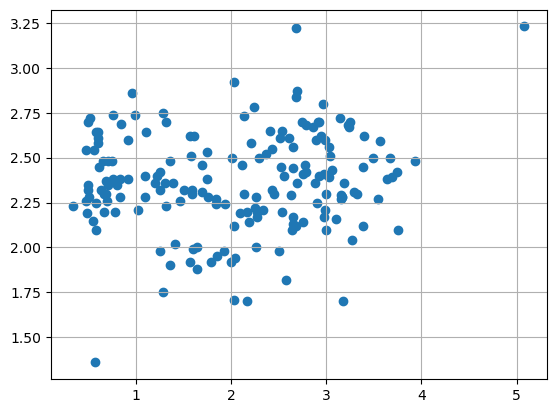

In [3]:
# Gráfica flavanoids vs ash
plt.scatter(df['flavanoids'],df['ash'])
plt.grid()

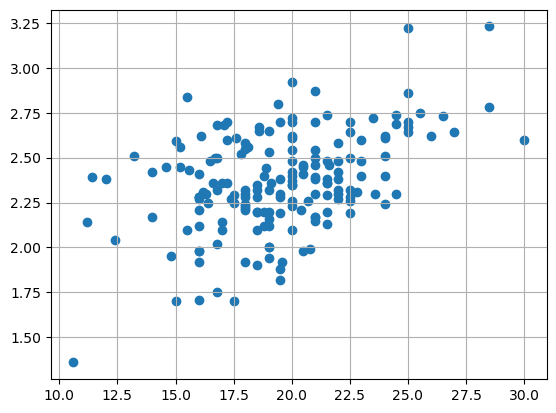

In [4]:
# Gráfica flavanoids vs ash
plt.scatter(df['alcalinity_of_ash'],df['ash'])
plt.grid()

In [5]:
minimize?

In [6]:
# Definimos funcion de criterio de minizacion
def fun(a,x,y):
    #datos medidos para encontrar la realcion
    f = a[0] + a[1]*x
    return np.mean((f-y)**2)

In [7]:
#relacion flavonoides y cenizas
a0 = np.random.rand(2) # Arreglo de dos elementos aleatorios uniformemente distribuidos entre 1 y 0

sol = minimize(fun,a0,args = (df.flavanoids,df.ash))

sol

#se imprimen como los imprimimos

      fun: 0.07385068677098998
 hess_inv: array([[ 2.57533481, -1.02270035],
       [-1.02270035,  0.50397459]])
      jac: array([1.67638063e-08, 2.23517418e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([2.30237812, 0.03160681])

La ecuacion encontrada es
$$
y = 2.3 + 0.032x.
$$

Con $mse = 0.0785$.

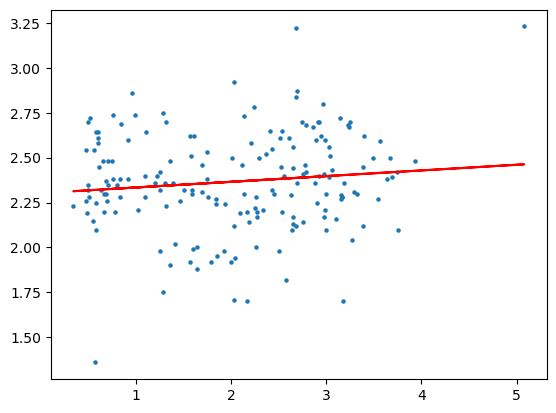

In [8]:
plt.scatter(df.flavanoids,df.ash,s=5)
x = df.flavanoids
a = sol.x
f= a[0] + a[1]*x
plt.plot(x,f,'r')

In [9]:
# Funcion lineal que relaciona ceniza y su alcalinidad
sol2 = minimize(fun,a0,args=(df.alcalinity_of_ash,df.ash))
sol2

      fun: 0.06012981364537818
 hess_inv: array([[17.63485336, -0.87895073],
       [-0.87895073,  0.04508214]])
      jac: array([2.77068466e-07, 5.54183498e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([1.6564679 , 0.03642222])

La ecuacion que relaciona 'alcalinity_of_ash' con ash es
$$
y = 1.656 + 0.036x.
$$

Con $mse = 0.06013$

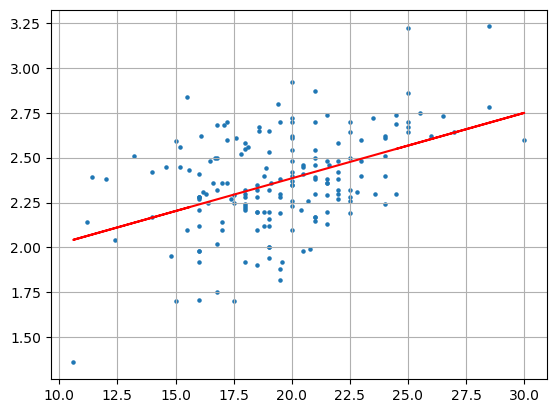

In [10]:
x = df.alcalinity_of_ash
plt.scatter(x,df.ash,s=5)
a = sol2.x
f = a[0] + a[1]*x
plt.plot(x,f,'r')
plt.grid()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin = LinearRegression()

In [ ]:
df['alcalinity_of_ash'].corr(df['flavanoids'])